<a href="https://colab.research.google.com/github/loguansiang/fyp/blob/main/technical_indicator_final_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [175]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras import optimizers
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout
from keras import optimizers
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [176]:
url = 'https://raw.githubusercontent.com/loguansiang/fyp/main/SAND%20fyp.csv'
df = pd.read_csv(url)

In [177]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)

In [178]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-14,0.086577,0.086577,0.059597,0.065645,0.065645,118988161
2020-08-15,0.066077,0.069509,0.048985,0.050964,0.050964,36213441
2020-08-16,0.051438,0.069508,0.048064,0.060847,0.060847,33023213
2020-08-17,0.060847,0.065073,0.052525,0.053999,0.053999,11686493
2020-08-18,0.053784,0.060990,0.050675,0.051700,0.051700,7401293
...,...,...,...,...,...,...
2022-04-13,2.781983,2.886945,2.751847,2.869923,2.869923,321784424
2022-04-14,2.869366,2.916186,2.714203,2.780882,2.780882,349909147
2022-04-15,2.781060,2.820187,2.755915,2.803639,2.803639,189256519


In [179]:
pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [180]:
import pandas as pd
import ta
from ta import add_all_ta_features
from ta.utils import dropna

In [181]:
df[('H-L')] = df['High'] - df['Low']
df[('0-C')]= df['Open'] - df['Close']
df['SMA_7'] = df.Close.rolling(7, min_periods=1).mean()
df['rsi_7']=ta.momentum.rsi(df.Close,window=7)
df['MACD'] = ta.trend.macd_diff(df.Close)
df.dropna(inplace= True)
df

,Open,High,Low,Close,Adj Close,Volume,H-L,0-C,SMA_7,rsi_7,MACD
Date,,,,,,,,,,,
2020-09-16,0.042322,0.050256,0.040562,0.044312,0.044312,6473697,0.009694,-0.001990,0.046752,43.582676,0.000059
2020-09-17,0.044342,0.046461,0.042495,0.043874,0.043874,3595836,0.003966,0.000468,0.045939,42.786274,0.000060
2020-09-18,0.043890,0.047040,0.043024,0.043945,0.043945,4563156,0.004016,-0.000055,0.044818,42.983313,0.000095
2020-09-19,0.043951,0.048655,0.042631,0.047067,0.047067,5332779,0.006024,-0.003116,0.044493,51.544190,0.000345
2020-09-20,0.047102,0.047966,0.042441,0.043057,0.043057,3428977,0.005525,0.004045,0.044413,42.077032,0.000260
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-13,2.781983,2.886945,2.751847,2.869923,2.869923,321784424,0.135098,-0.087940,2.886363,40.236566,-0.066120
2022-04-14,2.869366,2.916186,2.714203,2.780882,2.780882,349909147,0.201983,0.088484,2.843185,36.188051,-0.060530
2022-04-15,2.781060,2.820187,2.755915,2.803639,2.803639,189256519,0.064272,-0.022579,2.829312,38.046757,-0.051785


In [182]:
print(df['H-L'].describe())

count    579.000000
mean       0.169848
std        0.278086
min        0.001291
25%        0.018164
50%        0.065139
75%        0.204465
max        2.736287
Name: H-L, dtype: float64


In [183]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'H-L', '0-C',
       'SMA_7', 'rsi_7', 'MACD'],
      dtype='object')

In [184]:
def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon):
    X = []
    y = []
    start = start + window
    if end is None:
        end = len(dataset) - horizon

    for i in range(start, end):
        indices = range(i-window, i)
        X.append(dataset[indices])

        indicey = range(i+1, i+1+horizon)
        y.append(target[indicey])
    return np.array(X), np.array(y)

In [185]:
from sklearn.preprocessing import StandardScaler

In [186]:
#['H-L', '0-C','SMA_7', 'rsi_7','MACD']
X_scaler = StandardScaler()
Y_scaler = StandardScaler()
X_data = X_scaler.fit_transform(df[['H-L', '0-C','SMA_7', 'rsi_7','MACD']])
Y_data = Y_scaler.fit_transform(df[['Close']])


In [187]:
X_data

array([[-0.57641205,  0.01383272, -0.76399521, -0.50633068,  0.00980996],
       [-0.59702782,  0.02804702, -0.76444052, -0.5524044 ,  0.0098229 ],
       [-0.59684786,  0.02502258, -0.76505498, -0.54100525,  0.01030604],
       ...,
       [-0.37997918, -0.10523085,  0.7606541 , -0.82659664, -0.69696275],
       [-0.16538155, -0.08491562,  0.74632227, -0.72750452, -0.55867892],
       [-0.47108735,  0.19786109,  0.73829767, -0.84718941, -0.45915164]])

In [188]:
Y_data

array([[-0.76789771],
       [-0.76813607],
       [-0.76809743],
       [-0.76639845],
       [-0.76858067],
       [-0.77106383],
       [-0.76802451],
       [-0.76878747],
       [-0.76601099],
       [-0.76551795],
       [-0.76668688],
       [-0.76865468],
       [-0.7692767 ],
       [-0.76843864],
       [-0.76697639],
       [-0.76895236],
       [-0.76975722],
       [-0.76733937],
       [-0.76573617],
       [-0.76448888],
       [-0.7666662 ],
       [-0.76743242],
       [-0.76626458],
       [-0.76492695],
       [-0.76707979],
       [-0.76540856],
       [-0.76611438],
       [-0.76669504],
       [-0.76703625],
       [-0.76750861],
       [-0.76823293],
       [-0.7684985 ],
       [-0.76880488],
       [-0.76970335],
       [-0.77084561],
       [-0.77108506],
       [-0.7702655 ],
       [-0.77026659],
       [-0.76979096],
       [-0.77054794],
       [-0.7713898 ],
       [-0.77142463],
       [-0.77283083],
       [-0.77160585],
       [-0.77257397],
       [-0

In [189]:
hist_window = 10
horizon = 10
TRAIN_SPLIT = 488
x_train, y_train = custom_ts_multi_data_prep(X_data, Y_data, 0, TRAIN_SPLIT, hist_window, horizon)
x_vali, y_vali = custom_ts_multi_data_prep(X_data, Y_data, TRAIN_SPLIT, None, hist_window, horizon)

In [190]:
x_train

array([[[-0.57641205,  0.01383272, -0.76399521, -0.50633068,
          0.00980996],
        [-0.59702782,  0.02804702, -0.76444052, -0.5524044 ,
          0.0098229 ],
        [-0.59684786,  0.02502258, -0.76505498, -0.54100525,
          0.01030604],
        ...,
        [-0.58371826,  0.03300295, -0.76587946, -0.40158887,
          0.01138525],
        [-0.58097213, -0.00372408, -0.76557379,  0.24145158,
          0.0165827 ],
        [-0.59685506,  0.02054664, -0.76520277,  0.34326216,
          0.02064142]],

       [[-0.59702782,  0.02804702, -0.76444052, -0.5524044 ,
          0.0098229 ],
        [-0.59684786,  0.02502258, -0.76505498, -0.54100525,
          0.01030604],
        [-0.58962082,  0.00732121, -0.76523314, -0.04573833,
          0.01371002],
        ...,
        [-0.58097213, -0.00372408, -0.76557379,  0.24145158,
          0.0165827 ],
        [-0.59685506,  0.02054664, -0.76520277,  0.34326216,
          0.02064142],
        [-0.59943563,  0.03783165, -0.76524425, 

In [191]:
print ('Multiple window of past history\n')
print(x_train[0])
print ('\n Target horizon\n')
print (y_train[0])

Multiple window of past history

[[-0.57641205  0.01383272 -0.76399521 -0.50633068  0.00980996]
 [-0.59702782  0.02804702 -0.76444052 -0.5524044   0.0098229 ]
 [-0.59684786  0.02502258 -0.76505498 -0.54100525  0.01030604]
 [-0.58962082  0.00732121 -0.76523314 -0.04573833  0.01371002]
 [-0.59141678  0.04873236 -0.76527689 -0.59343575  0.01255066]
 [-0.58262053  0.05172789 -0.76589606 -1.07063178  0.00810267]
 [-0.58166316 -0.00699719 -0.76575148 -0.23338071  0.01065755]
 [-0.58371826  0.03300295 -0.76587946 -0.40158887  0.01138525]
 [-0.58097213 -0.00372408 -0.76557379  0.24145158  0.0165827 ]
 [-0.59685506  0.02054664 -0.76520277  0.34326216  0.02064142]]

 Target horizon

[[-0.76865468]
 [-0.7692767 ]
 [-0.76843864]
 [-0.76697639]
 [-0.76895236]
 [-0.76975722]
 [-0.76733937]
 [-0.76573617]
 [-0.76448888]
 [-0.7666662 ]]


In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px # to plot the time series plot
from sklearn import metrics # for the evalution
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

import tensorflow as tf

In [193]:
batch_size = 32
buffer_size = 18

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.cache().shuffle(buffer_size).batch(batch_size).repeat()

val_data = tf.data.Dataset.from_tensor_slices((x_vali, y_vali))
val_data = val_data.batch(batch_size).repeat()

In [194]:
x_train.shape

(478, 10, 5)

In [195]:
x_train.shape[-2:]

(10, 5)

In [196]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(7)

lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True,input_shape=x_train.shape[-2:]),                       
    #tf.keras.layers.Dense(20, activation='tanh'),
    #tf.keras.layers.LSTM(50),
    #tf.keras.layers.Dense(20, activation='tanh'),
    #tf.keras.layers.Dense(20, activation='tanh'),
    #tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=horizon,activation='relu'),
])
lstm_model.compile(optimizer='adam', loss='mse')


In [197]:

lstm_model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 10, 50)            11200     
                                                                 
 dense_8 (Dense)             (None, 10, 10)            510       
                                                                 
Total params: 11,710
Trainable params: 11,710
Non-trainable params: 0
_________________________________________________________________


In [198]:
model_path = 'Bidirectional_LSTM_Multivariate.h5'
early_stopings = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min')
checkpoint =  tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, mode='min', verbose=0)
callbacks=[early_stopings,checkpoint]

In [199]:
history = lstm_model.fit(train_data,epochs=50,steps_per_epoch=100,validation_data=val_data,validation_steps=50,verbose=1,callbacks=callbacks)

Epoch 1/50
100/100 [==============================] - 12s 97ms/step - loss: 0.6830 - val_loss: 0.5930
Epoch 2/50
100/100 [==============================] - 2s 18ms/step - loss: 0.4541 - val_loss: 0.6713
Epoch 3/50
100/100 [==============================] - 7s 74ms/step - loss: 0.4030 - val_loss: 0.6310
Epoch 4/50
100/100 [==============================] - 5s 54ms/step - loss: 0.3909 - val_loss: 0.6303
Epoch 5/50
100/100 [==============================] - 4s 44ms/step - loss: 0.3779 - val_loss: 0.5970
Epoch 6/50
100/100 [==============================] - 3s 34ms/step - loss: 0.3530 - val_loss: 0.6040
Epoch 7/50
100/100 [==============================] - 10s 96ms/step - loss: 0.3600 - val_loss: 0.7519
Epoch 8/50
100/100 [==============================] - 5s 50ms/step - loss: 0.3506 - val_loss: 0.6567
Epoch 9/50
100/100 [==============================] - 3s 29ms/step - loss: 0.3325 - val_loss: 0.6253
Epoch 10/50
100/100 [==============================] - 1s 14ms/step - loss: 0.3462 - val_

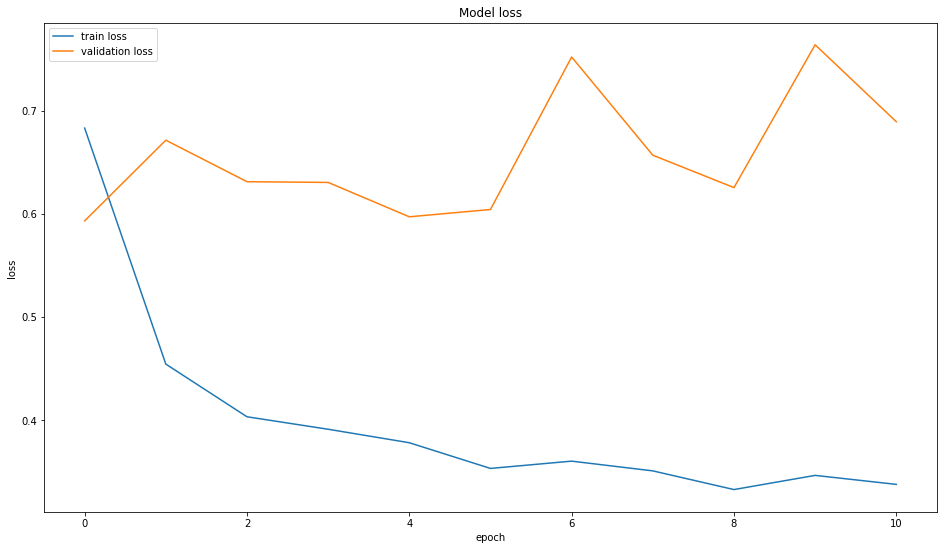

In [200]:
plt.figure(figsize=(16,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'])
plt.show()

In [201]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'H-L', '0-C',
       'SMA_7', 'rsi_7', 'MACD'],
      dtype='object')

In [202]:
data_val = X_scaler.fit_transform(df[['H-L', '0-C','SMA_7', 'rsi_7','MACD']].tail(10))  #horizon size
val_rescaled = data_val.reshape(1, data_val.shape[0], data_val.shape[1])

In [203]:
pred = lstm_model.predict(val_rescaled)
pred =pred.reshape( 10,10)

In [204]:
pred_Inverse = Y_scaler.inverse_transform(pred)

In [205]:
pred_Inverse

array([[3.7458906, 3.6063852, 3.646217 , 3.599738 , 3.3675077, 3.2692313,
        3.389095 , 3.2671306, 3.4709482, 3.3616233],
       [5.01315  , 4.8781543, 4.8133464, 4.9325547, 4.8314877, 4.8606834,
        4.884075 , 4.8735714, 4.9327607, 4.799947 ],
       [4.8981366, 4.767164 , 4.9026246, 4.7975583, 4.976689 , 4.8114147,
        4.764891 , 4.775556 , 4.8435144, 4.8376727],
       [3.9557064, 3.8381422, 4.121609 , 3.8022597, 4.201895 , 3.8681421,
        3.8728445, 3.7049568, 3.7777863, 4.0111933],
       [4.1793385, 4.0443335, 4.25535  , 4.0974507, 4.3422585, 4.165481 ,
        4.230094 , 4.0406756, 4.217138 , 4.1810865],
       [5.023139 , 4.785233 , 4.898157 , 5.1322   , 5.105214 , 5.046301 ,
        5.258591 , 4.83008  , 5.069261 , 4.9695144],
       [5.0953116, 4.8503933, 5.053751 , 5.197819 , 5.1762433, 5.0688195,
        5.314512 , 4.805461 , 5.045651 , 5.057877 ],
       [5.29545  , 4.9446526, 5.0754857, 5.3188972, 5.292497 , 5.2449393,
        5.4574213, 4.953411 , 5.28786

In [206]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    #print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [207]:
pred_Inverse[0]

array([3.7458906, 3.6063852, 3.646217 , 3.599738 , 3.3675077, 3.2692313,
       3.389095 , 3.2671306, 3.4709482, 3.3616233], dtype=float32)

In [208]:
validate = (df[['Open','High',	'Low'	,	'Volume','Close','MACD']].tail(10))
timeseries_evaluation_metrics_func(validate['Close'],pred_Inverse[0])

Evaluation metric results:-
MSE is : 0.43407307075251395
MAE is : 0.6404877042160034
RMSE is : 0.6588422199225805
MAPE is : 22.67835407662019
R2 is : -57.590163403726244



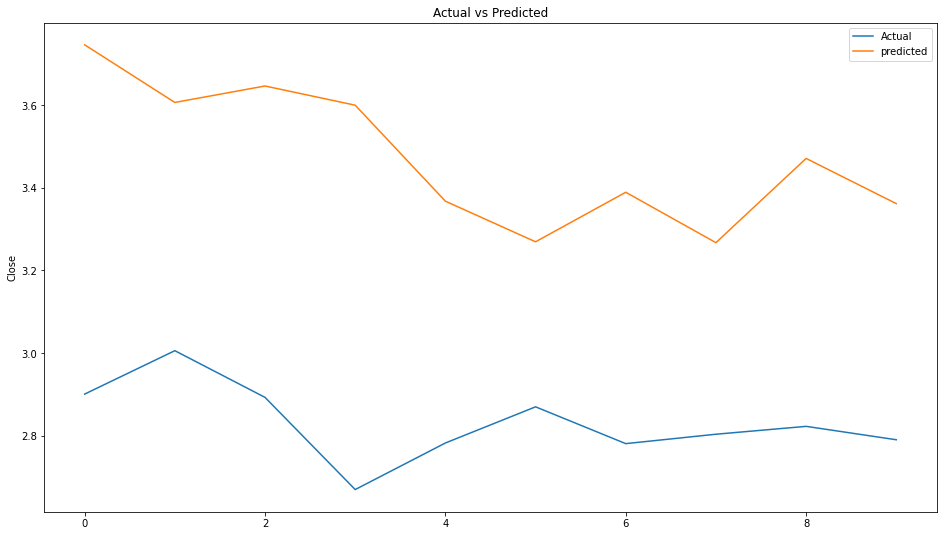

In [209]:
plt.figure(figsize=(16,9))
plt.plot( list(validate['Close']))
plt.plot( list(pred_Inverse[0]))
plt.title("Actual vs Predicted")
plt.ylabel("Close")
plt.legend(('Actual','predicted'))
plt.show()